In [9]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from google.colab import files
from scipy.io import wavfile
from google.colab import files

# Unggah file .wav yang sudah dilampirkan di Elena
uploaded = files.upload()

Saving [Sampel Audio] Via-Vallen-Meraih-Bintang.wav to [Sampel Audio] Via-Vallen-Meraih-Bintang.wav


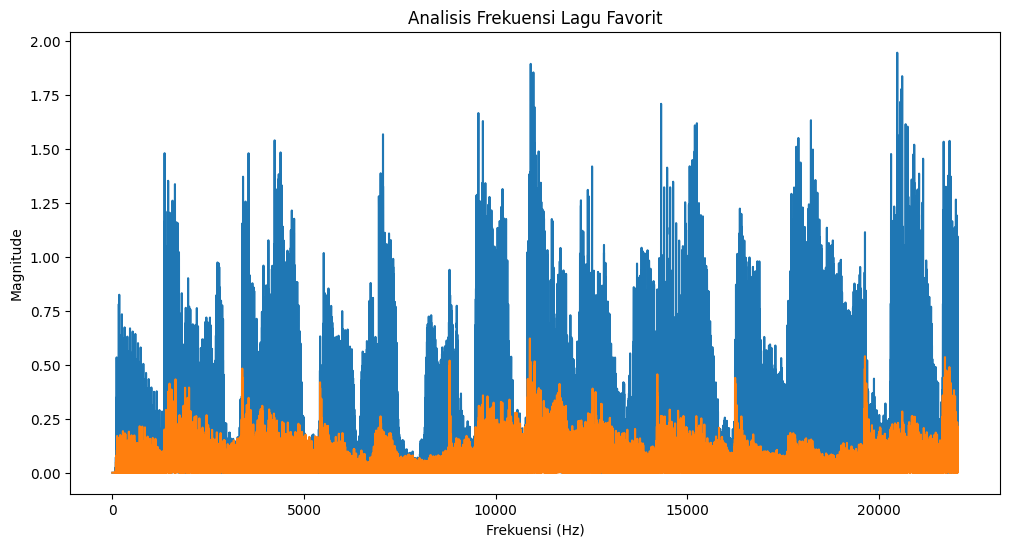

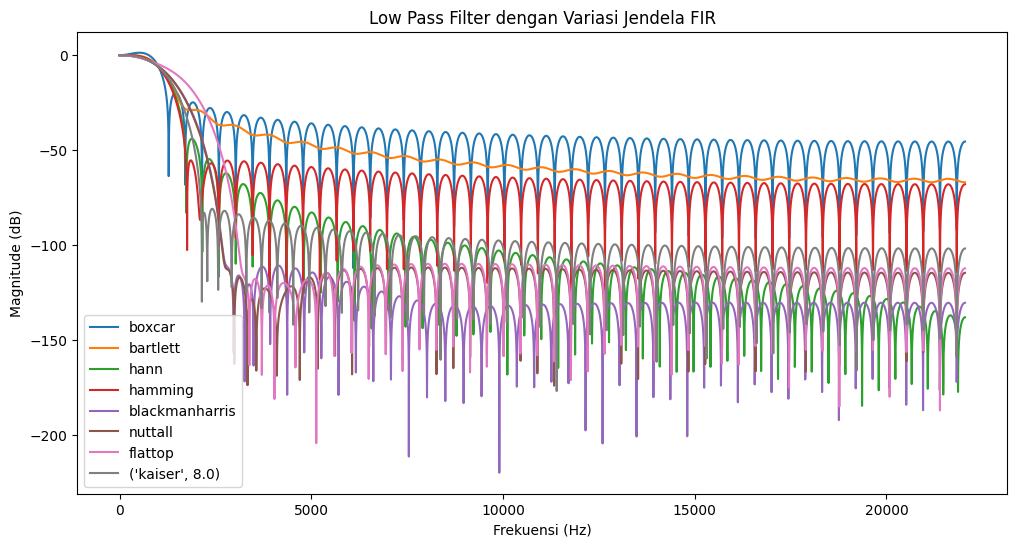

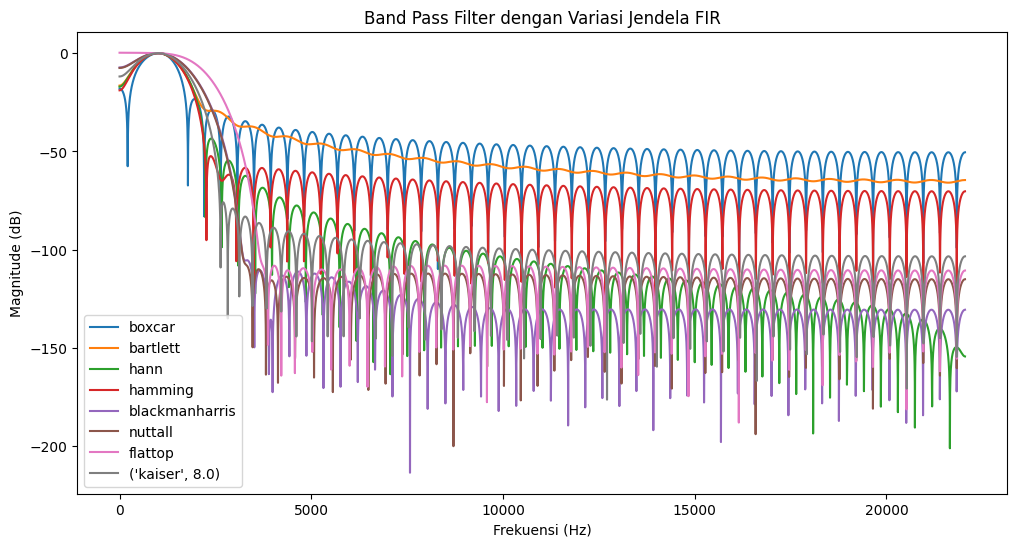

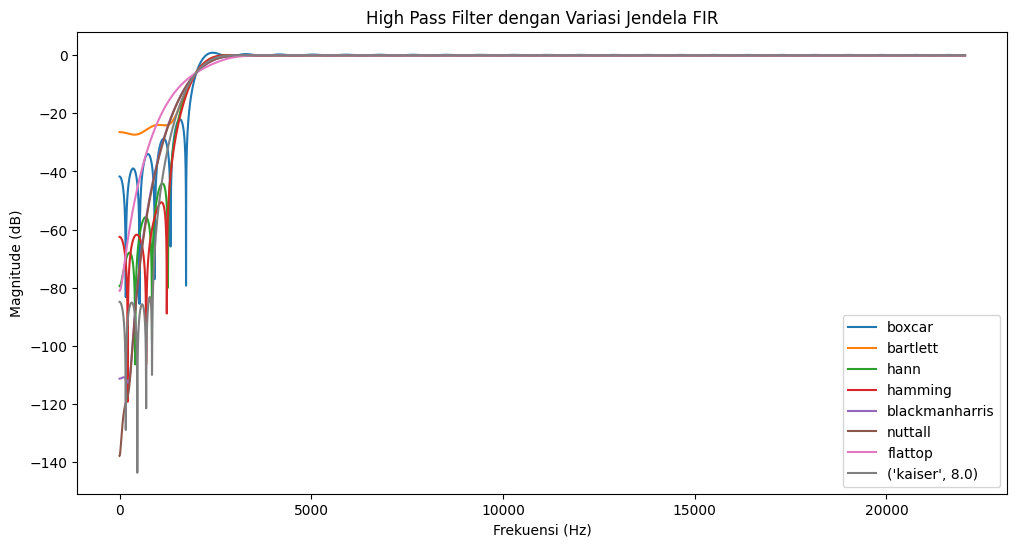

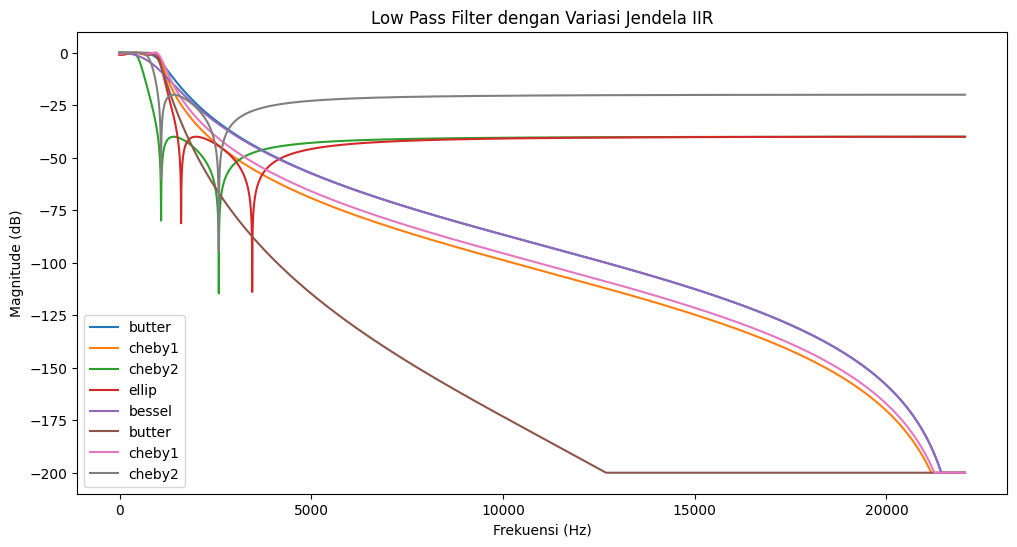

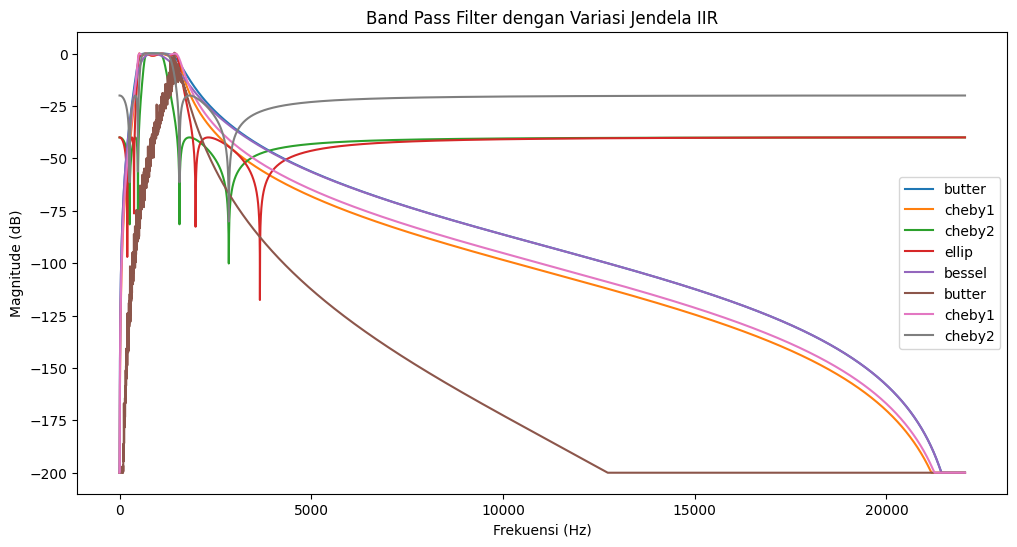

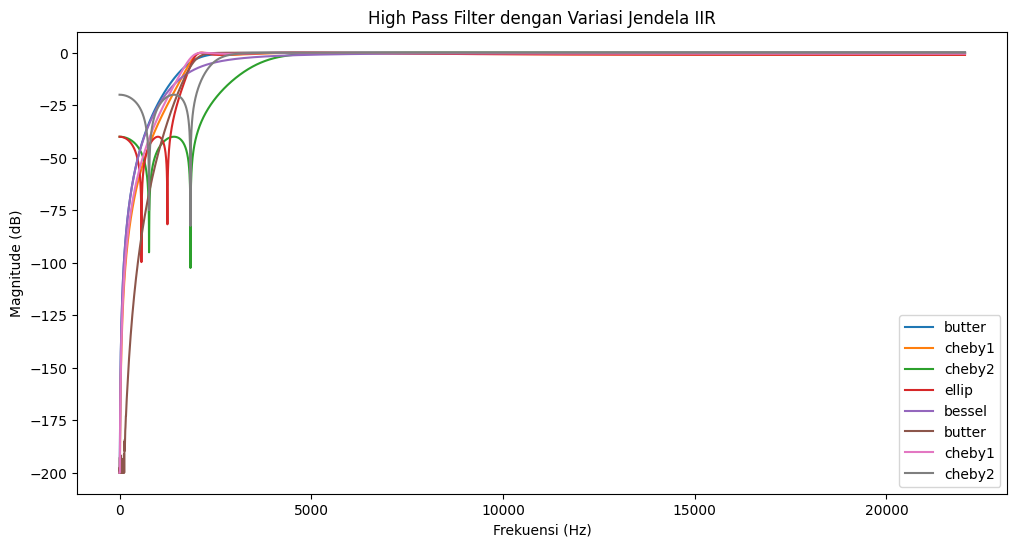

In [10]:
# Ambil nama file yang diunggah
file_name = list(uploaded.keys())[0]

# Baca file .wav
sampling_rate, data = wavfile.read(file_name)

# Normalisasi data
data = data / np.max(np.abs(data))

# Tentukan panjang filter FIR (numtaps)
numtaps = 101  # Misalnya, panjang filter FIR adalah 101

# Tentukan frekuensi cutoff untuk filter Low Pass, Band Pass, dan High Pass
cutoff_lp = 1000  # Frekuensi cutoff untuk Low Pass Filter
cutoff_bp = [500, 1500]  # Rentang frekuensi cutoff untuk Band Pass Filter
cutoff_hp = 2000  # Frekuensi cutoff untuk High Pass Filter

# Analisis Frekuensi menggunakan FFT
frequencies = np.fft.fftfreq(len(data), 1/sampling_rate)
fft_values = np.fft.fft(data)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('Analisis Frekuensi Lagu Favorit')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude')
plt.show()

# Desain filter Low Pass, Band Pass, dan High Pass dengan variasi jendela FIR
fir_windows = ['boxcar', 'bartlett', 'hann', 'hamming', 'blackmanharris', 'nuttall', 'flattop', ('kaiser', 8.0)]

# Low Pass Filter dengan Variasi Jendela FIR
plt.figure(figsize=(12, 6))
for window in fir_windows:
    if isinstance(window, tuple):
        fir_lp = signal.firwin(numtaps, cutoff_lp, window=window, fs=sampling_rate)
    else:
        fir_lp = signal.firwin(numtaps, cutoff_lp, window=window, fs=sampling_rate)
    w, h = signal.freqz(fir_lp, worN=8000)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=str(window))
plt.title('Low Pass Filter dengan Variasi Jendela FIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

# Band Pass Filter dengan Variasi Jendela FIR
plt.figure(figsize=(12, 6))
for window in fir_windows:
    if isinstance(window, tuple):
        fir_bp = signal.firwin(numtaps, cutoff_bp, window=window, fs=sampling_rate, pass_zero=False)
    else:
        fir_bp = signal.firwin(numtaps, cutoff_bp, window=window, fs=sampling_rate, pass_zero=False)
    w, h = signal.freqz(fir_bp, worN=8000)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=str(window))
plt.title('Band Pass Filter dengan Variasi Jendela FIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

# High Pass Filter dengan Variasi Jendela FIR
plt.figure(figsize=(12, 6))
for window in fir_windows:
    if isinstance(window, tuple):
        fir_hp = signal.firwin(numtaps, cutoff_hp, window=window, fs=sampling_rate, pass_zero=False)
    else:
        fir_hp = signal.firwin(numtaps, cutoff_hp, window=window, fs=sampling_rate, pass_zero=False)
    w, h = signal.freqz(fir_hp, worN=8000)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=str(window))
plt.title('High Pass Filter dengan Variasi Jendela FIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

# Desain filter IIR dan visualisasi
iir_filters = [
    {'type': 'butter'},
    {'type': 'cheby1', 'rp': 1},
    {'type': 'cheby2', 'rs': 40},
    {'type': 'ellip', 'rp': 1, 'rs': 40},
    {'type': 'bessel'},
    {'type': 'butter', 'order': 8},  # Higher order Butterworth
    {'type': 'cheby1', 'rp': 0.5},   # Different ripple for Chebyshev I
    {'type': 'cheby2', 'rs': 20}     # Different ripple for Chebyshev II
]

def design_iir_filter(filter_type, cutoff, btype, sampling_rate, **kwargs):
    order = kwargs.get('order', 4)
    if filter_type == 'cheby1':
        return signal.iirfilter(order, cutoff, btype=btype, ftype=filter_type, rp=kwargs.get('rp'))
    elif filter_type == 'cheby2':
        return signal.iirfilter(order, cutoff, btype=btype, ftype=filter_type, rs=kwargs.get('rs'))
    elif filter_type == 'ellip':
        return signal.iirfilter(order, cutoff, btype=btype, ftype=filter_type, rp=kwargs.get('rp'), rs=kwargs.get('rs'))
    else:
        return signal.iirfilter(order, cutoff, btype=btype, ftype=filter_type)

# Low Pass Filter dengan Variasi Jendela IIR
plt.figure(figsize=(12, 6))
for f in iir_filters:
    rp = f.get('rp', 1)
    rs = f.get('rs', 40)
    order = f.get('order', 4)
    b, a = design_iir_filter(f['type'], cutoff_lp / (0.5 * sampling_rate), 'low', sampling_rate, rp=rp, rs=rs, order=order)
    w, h = signal.freqz(b, a, worN=8000)
    h = np.where(abs(h) < 1e-10, 1e-10, h)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=f['type'])
plt.title('Low Pass Filter dengan Variasi Jendela IIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

# Band Pass Filter dengan Variasi Jendela IIR
plt.figure(figsize=(12, 6))
for f in iir_filters:
    rp = f.get('rp', 1)
    rs = f.get('rs', 40)
    order = f.get('order', 4)
    b, a = design_iir_filter(f['type'], [x / (0.5 * sampling_rate) for x in cutoff_bp], 'band', sampling_rate, rp=rp, rs=rs, order=order)
    w, h = signal.freqz(b, a, worN=8000)
    h = np.where(abs(h) < 1e-10, 1e-10, h)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=f['type'])
plt.title('Band Pass Filter dengan Variasi Jendela IIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

# High Pass Filter dengan Variasi Jendela IIR
plt.figure(figsize=(12, 6))
for f in iir_filters:
    rp = f.get('rp', 1)
    rs = f.get('rs', 40)
    order = f.get('order', 4)
    b, a = design_iir_filter(f['type'], cutoff_hp / (0.5 * sampling_rate), 'high', sampling_rate, rp=rp, rs=rs, order=order)
    w, h = signal.freqz(b, a, worN=8000)
    h = np.where(abs(h) < 1e-10, 1e-10, h)
    plt.plot(w * sampling_rate / (2 * np.pi), 20 * np.log10(abs(h)), label=f['type'])
plt.title('High Pass Filter dengan Variasi Jendela IIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.show()

